**<h1>IPL 2022 Capstone Project</h1>**

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**

- date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string
- gure : string

**<h3>Loading the Libraries and Dataset</h3>**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


**<h3>Basic Information</h3>**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

**Check the size of rows and columns of the dataset.**

In [4]:
print(f"No. of Rows = {df.shape[0]}, No. of Cols = {df.shape[1]}")

No. of Rows = 74, No. of Cols = 20


**Now let's see how many columns have non-null values in total.**

In [5]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, here comes some Basic Questions**
1. Which team won the most matches?

Text(0.5, 1.0, 'Most Match Wins by Team')

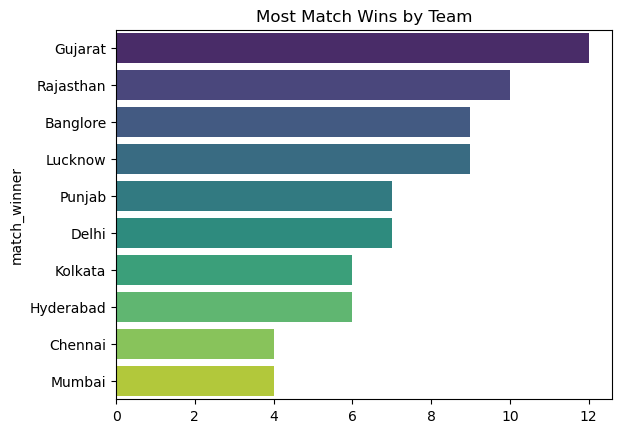

In [6]:
match_wins = df["match_winner"].value_counts()
sns.barplot(y = match_wins.index, x = match_wins.values, palette = 'viridis')
plt.title("Most Match Wins by Team")

2. Toss Decision Trends

<Axes: xlabel='toss_decision', ylabel='count'>

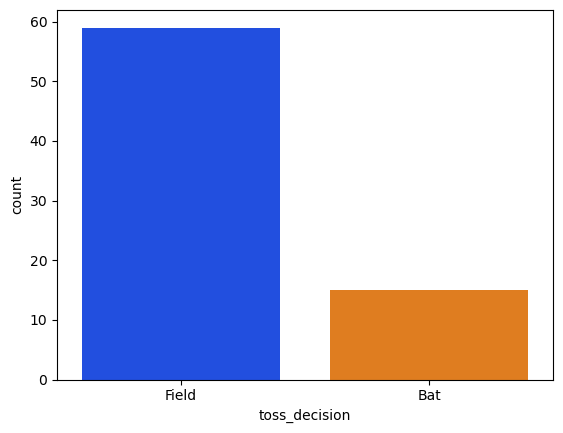

In [12]:
sns.countplot(x = df['toss_decision'], palette = "bright")

3. Toss Winner vs Match Winner

In [18]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

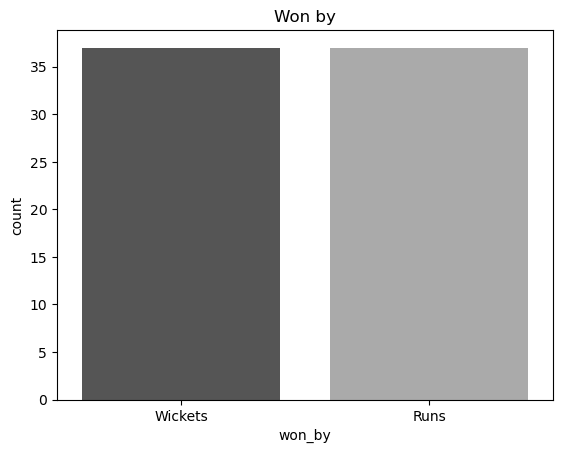

In [21]:
sns.countplot(x = df['won_by'], palette = "grey")
plt.title("Won by") 

**<h3>Key Player Performance</h3>**

1. Most "Player of the Match" Awards

Text(0.5, 1.0, 'Top 10 Player of the Match Players')

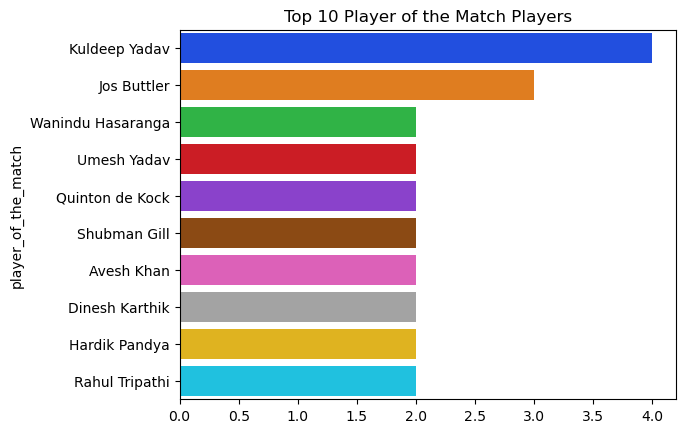

In [26]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = count.values, y = count.index, palette = 'bright')
plt.title("Top 10 Player of the Match Players")

2. Top Scorers

<Axes: ylabel='top_scorer'>

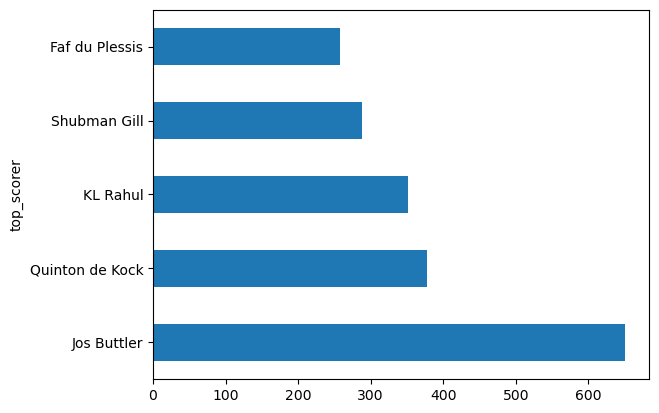

In [31]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(5)
high.plot(kind = "barh")

3. Top 10 Bowling Figures

<Axes: ylabel='best_bowling'>

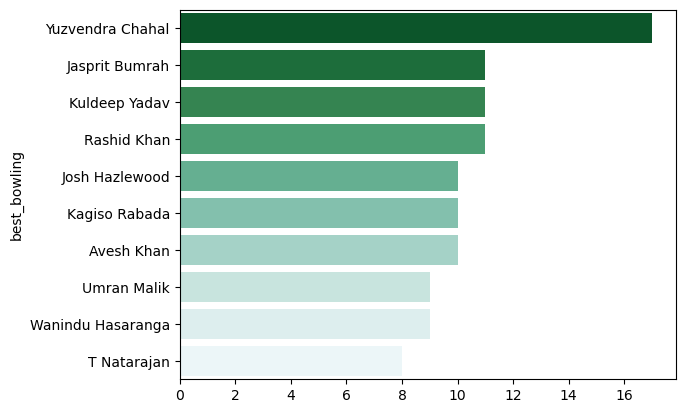

In [41]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
figures = df.groupby("best_bowling")['highest_wickets'].sum().sort_values(ascending = False).head(10)
sns.barplot(x = figures.values, y = figures.index, palette="BuGn_r")

**<h3>Venue Analysis</h3>**

1. Most Matches Played By Venue

<Axes: ylabel='venue'>

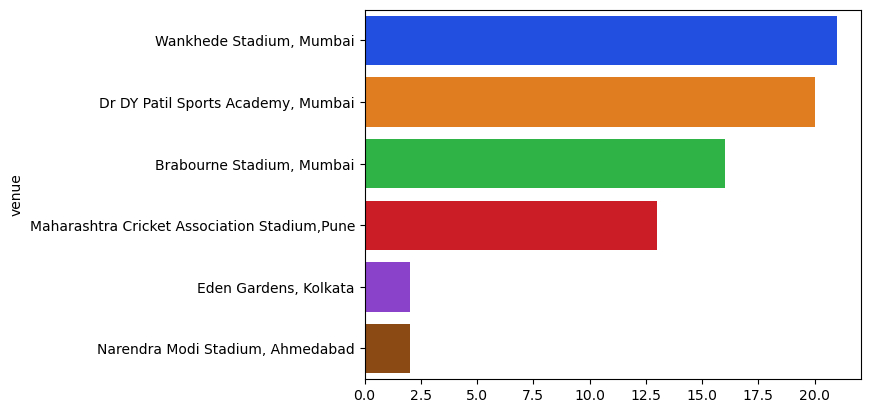

In [47]:
venue_count = df['venue'].value_counts()
sns.barplot(y = venue_count.index, x = venue_count.values, palette = 'bright')

**<h3>Custom Questions & Insights</h3>**

1. Who won by the highest margin by runs?

In [49]:
df[df["won_by"] == "Runs"].sort_values(by = 'margin', ascending = False).head(1)[['match_winner', 'margin']]

,match_winner,margin
54,Chennai,91


2. Whcih player had the highest individual score?

In [53]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


3. Which bowler had the best bowling figures?

In [54]:

df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure', 'highest_wickets']]

,best_bowling,best_bowling_figure,highest_wickets
29,Yuzvendra Chahal,5--40,5
39,Umran Malik,5--25,5
53,Wanindu Hasaranga,5--18,5
55,Jasprit Bumrah,5--10,5


**<h3>Work Done a Good Example</h3>**